In [43]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


In [44]:
Data_Center = pd.read_csv("root_cause_analysis.csv")

In [45]:
print(Data_Center.head())

   ID  CPU_LOAD  MEMORY_LEAK_LOAD  DELAY  ERROR_1000  ERROR_1001  ERROR_1002  \
0   1         0                 0      0           0           1           0   
1   2         0                 0      0           0           0           0   
2   3         0                 1      1           0           0           1   
3   4         0                 1      0           1           1           0   
4   5         1                 1      0           1           0           1   

   ERROR_1003     ROOT_CAUSE  
0           1    MEMORY_LEAK  
1           1    MEMORY_LEAK  
2           1    MEMORY_LEAK  
3           1    MEMORY_LEAK  
4           0  NETWORK_DELAY  


In [46]:
label_encoder= preprocessing.LabelEncoder()
Data_Center['ROOT_CAUSE']=label_encoder.fit_transform(Data_center['ROOT_CAUSE'])
print(Data_Center.head())

   ID  CPU_LOAD  MEMORY_LEAK_LOAD  DELAY  ERROR_1000  ERROR_1001  ERROR_1002  \
0   1         0                 0      0           0           1           0   
1   2         0                 0      0           0           0           0   
2   3         0                 1      1           0           0           1   
3   4         0                 1      0           1           1           0   
4   5         1                 1      0           1           0           1   

   ERROR_1003  ROOT_CAUSE  
0           1           1  
1           1           1  
2           1           1  
3           1           1  
4           0           2  


In [60]:
np_Data_Center= Data_Center.to_numpy()
np_Data_Center

array([[   1,    0,    0, ...,    0,    1,    1],
       [   2,    0,    0, ...,    0,    1,    1],
       [   3,    0,    1, ...,    1,    1,    1],
       ...,
       [ 998,    1,    1, ...,    0,    0,    1],
       [ 999,    0,    1, ...,    0,    0,    2],
       [1000,    1,    0, ...,    1,    0,    0]], dtype=int64)

In [90]:
X_data= np_Data_Center[:,1:8]
Y_data=np_Data_Center[:,8:]

print(X_data[:5,:])
print(Y_data[:5])

[[0 0 0 0 1 0 1]
 [0 0 0 0 0 0 1]
 [0 1 1 0 0 1 1]
 [0 1 0 1 1 0 1]
 [1 1 0 1 0 1 0]]
[[1]
 [1]
 [1]
 [1]
 [2]]


In [70]:
X_train,X_test,Y_train,Y_test= train_test_split(X_data,Y_data,test_size=0.1)

In [106]:
import tensorflow as tf
from tensorflow import keras
NB_classes=3
model= tf.keras.models.Sequential()
model.add(keras.layers.Dense(256, 
                             input_shape=[7],
                            name='Hidden_layer_1',
                            activation='relu'))
model.add(keras.layers.Dense(256,
                             name='Hidden_layer_2',
                            activation='relu'))
#if the data is binary it is better to choose sigmoid
model.add(keras.layers.Dense(NB_classes,
                             name='output-layer',
                              activation='sigmoid'))


model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Hidden_layer_1 (Dense)      (None, 256)               2048      
                                                                 
 Hidden_layer_2 (Dense)      (None, 256)               65792     
                                                                 
 output-layer (Dense)        (None, 3)                 771       
                                                                 
Total params: 68,611
Trainable params: 68,611
Non-trainable params: 0
_________________________________________________________________


Epoch 1/10
1/1 [==============================] - 0s 138ms/step - loss: 0.2718 - accuracy: 0.8694 - val_loss: 0.3454 - val_accuracy: 0.8333
Epoch 2/10
1/1 [==============================] - 0s 69ms/step - loss: 0.2668 - accuracy: 0.8736 - val_loss: 0.3451 - val_accuracy: 0.8333
Epoch 3/10
1/1 [==============================] - 0s 64ms/step - loss: 0.2661 - accuracy: 0.8736 - val_loss: 0.3442 - val_accuracy: 0.8333
Epoch 4/10
1/1 [==============================] - 0s 51ms/step - loss: 0.2659 - accuracy: 0.8736 - val_loss: 0.3439 - val_accuracy: 0.8333
Epoch 5/10
1/1 [==============================] - 0s 43ms/step - loss: 0.2658 - accuracy: 0.8736 - val_loss: 0.3434 - val_accuracy: 0.8333
Epoch 6/10
1/1 [==============================] - 0s 44ms/step - loss: 0.2657 - accuracy: 0.8736 - val_loss: 0.3432 - val_accuracy: 0.8333
Epoch 7/10
1/1 [==============================] - 0s 48ms/step - loss: 0.2657 - accuracy: 0.8736 - val_loss: 0.3429 - val_accuracy: 0.8333
Epoch 8/10
1/1 [==========

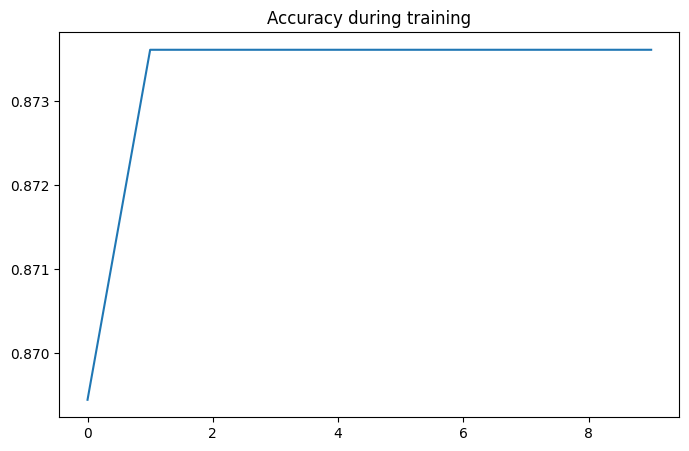

4/4 [==============================] - 0s 2ms/step - loss: 0.2813 - accuracy: 0.8700


[0.28131839632987976, 0.8700000047683716]

In [153]:
batchsize=1024
epoch= 10
VERBOSE= 1
validation_splt=0.2
history=model.fit(X_train,
                  Y_train,
                  batch_size=batchsize,
                  epochs=epoch,
                  verbose=VERBOSE,
                   validation_split=validation_splt
                   )
import matplotlib.pyplot as plt
pd.DataFrame(history.history)['accuracy'].plot(figsize=(8,5))
plt.title('Accuracy during training')
plt.show()
#evaluate dataset against test data
model.evaluate(X_test,Y_test)

In [154]:
#save model
model.save('Data_center_save')

INFO:tensorflow:Assets written to: Data_center_save\assets


INFO:tensorflow:Assets written to: Data_center_save\assets


In [155]:
#loading a model
loaded_model=keras.models.load_model('Data_center_save')

#print model summary
loaded_model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Hidden_layer_1 (Dense)      (None, 256)               2048      
                                                                 
 Hidden_layer_2 (Dense)      (None, 256)               65792     
                                                                 
 output-layer (Dense)        (None, 3)                 771       
                                                                 
Total params: 68,611
Trainable params: 68,611
Non-trainable params: 0
_________________________________________________________________
